# Assignment on LDA

-Importing modules:

In [1]:
#Importing all the required modules for this task/assignment

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# from numpy import linear algebra
from numpy import linalg as LA

#load the iris data from sklearn
from sklearn.datasets import load_iris

#load the LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. Implement LDA (40 points)

Implement your own class to carry out two-class LDA. Use the iris dataset to test and compare your results with LDA in sklearn.

- Loading Iris data:

In [2]:
# loading the dataset Iris from sklearn
iris_data = load_iris()

# sorting the data and target from the iris data
#values of the variables/features
iris_variables = iris_data.data

#labels as target
iris_label = iris_data.target

#getting the target names
target_names = iris_data.target_names

#In the below code, dataset is divided into three groups as there are 3 targets with their respective variables/features

#For setosa and versicolor
setosa_versicolor = iris_data.data[0:100,0:4]
setosa_versicolor_targets = iris_data.target[0:100]

#For versicolor and virginica
versicolor_virginica = iris_data.data[50:150,0:4]
versicolor_virginica_targets = iris_data.target[50:150]

#For setosa and virginica
setosa_virginica = np.concatenate((iris_data.data[0:50,0:4], iris_data.data[100:150,0:4]), axis=0)
setosa_virginica_targets = np.concatenate((iris_data.target[0:50], iris_data.target[100:150]), axis=0)


- Writing a class for LDA:

In [3]:
#Building a class for two-class LDA:
class LDA_analysis:
    
    #constructor which takes number of components.
    def __init__(self, n_components):
        
        self.n_components = n_components
        
        #In this variable, we store eigenvectors called as 'W'
        self.linear_discriminants = None
        
    
    #A method/function is built within the class which takes in dataset variables/features and labels/target
    def fit(self,variables, labels):
        
        #taking the number of features from the variables
        n_features = np.shape(variables)[1] 
        
        #This is to show the unique labels 
        class_labels = np.unique(labels) 
       
        
        #Working on within class scatter and between class scatter
        #calculating the mean for all the columns
        mean_overall = np.mean(variables, axis=0)
        
        S_Within = np.zeros((n_features,n_features)) # 4 X 4
        S_Between = np.zeros((n_features,n_features)) # 4 X 4  for iris data
        
        #for loop the class labels/target
        for c in class_labels:
            X_c = variables[labels==c]
            
            #Calculate the mean of X_c
            mean_c = np.mean(X_c, axis = 0)
            
            ##substract the each individual mean value to the dataset mean value and do a dot product 
            #calculating within class scatter
            S_Within += (X_c - mean_c).T.dot((X_c - mean_c))
       
            #Here, we are finding the count of first column
            n_count = X_c.shape[0]
            
            #calculate the mean difference from mean overall and reshape the features
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            
            #Take the mean difference dot product and multiple it with total number of rows.
            #calculating between class scatter
            S_Between += n_count * (mean_diff).dot(mean_diff.T)
        

        #calculate the dot product of within class scatter and between class scatter
        #Calculating the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_Within).dot(S_Between))
        #print("The Eigenvalues:\n", eigenvalues)
        #print("The Eigenvectors:\n", eigenvectors)
        
        #transpose the eigenvectors
        eigenvectors = eigenvectors.T
        
        #Sort the eigenvalues and eigenvectors
        #getting absolute eigenvalues and sort by decreasing order
        indxs = np.argsort(abs(eigenvalues))[::-1]
       
        #Now get the eigenvalues and eigenvectors from the variable indices
        eigenvalues = eigenvalues[indxs]
        eigenvectors = eigenvectors[indxs]
        
        #Store the first eigenvectors with highest value into the linear discriminant created above and set the dimension
        self.linear_discriminants = eigenvectors[0:self.n_components]
        print("The matrix W:\n",self.linear_discriminants.T)
        
    #This method  transform the data and returns the scores   
    def transform(self,variables):
        
        #return np.matmul(variables,self.linear_discriminants.T)
        return np.dot(variables, self.linear_discriminants.T)

The matrix W:
 [[-0.28543316]
 [-0.2165812 ]
 [ 0.65799713]
 [ 0.66231433]]


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


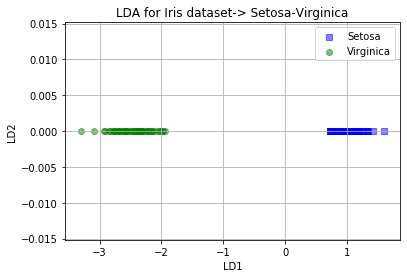

In [4]:
#calling the class of LDA
#passing the number of components as 1 for one dimension
lda = LDA_analysis(1)

#calling the methods from the class and passing the parameters
#using setosa and virginica data
lda.fit(setosa_virginica,setosa_virginica_targets)

#This return the scores to plot
iris_projected = lda.transform(setosa_virginica)
iris_projected = -iris_projected


# preparing a list for color, marker and label
target_names = ['Setosa', 'Virginica']
colors = ['blue','green']
markers = ['s','o']

#Plot a scatter plot using the scores generated above 
#The plot from this shows different color for each label/target
fig, ax = plt.subplots() 
for c, i, g, m in zip(colors,[0,2], target_names,markers):
    ax.scatter(iris_projected[setosa_virginica_targets==i,0], np.zeros([50]), marker= m ,alpha=0.5, color= c, label = g)
ax.legend(loc='best')
ax.grid(True)
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title("LDA for Iris dataset-> Setosa-Virginica")
fig.show()

- Comparing the results with LDA in sklearn:

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


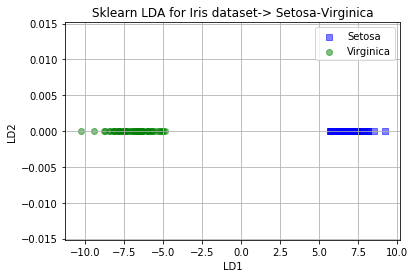

In [5]:
#Use the LDA imported from sklearn
sklearn_lda = LDA()

#dimensional reduction occur here by passing the parameter from the iris data
#using setosa and Virginica
iris_lda_sklearn = sklearn_lda.fit_transform(setosa_virginica,setosa_virginica_targets)
iris_lda_sklearn = -iris_lda_sklearn


# preparing a list for color, marker and label
target_names = ['Setosa', 'Virginica']
colors = ['blue','green']
markers = ['s','o']

#Plot a scatter plot using the scores generated above 
#The plot from this shows different color for each label     
fig, ax = plt.subplots() 
for c, i, g, m in zip(colors,[0,2], target_names,markers):
    ax.scatter(iris_lda_sklearn[setosa_virginica_targets==i,0], np.zeros([50]), marker= m ,alpha=0.5, color= c, label = g)
ax.legend(loc='best')
ax.grid(True)
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title("Sklearn LDA for Iris dataset-> Setosa-Virginica")
fig.show()

# 2. PCA and LDA (60 points)

In dataset dataset 1.csv, columns correspond to variables and there are two variables named V1 and V2.

- Reading the CSV file and manipulating the data:

In [6]:
#Read the csv file to run the LDA class.
assg3_dataset= pd.read_csv('C:/Users/mayur/Documents/UNCC/Machine_learning/dataset_1.csv')

#Manipulating the data
#storing the features into one variable
data_variable = assg3_dataset[['V1','V2']]
#Converting the above variable data to numpy array
V_variables = data_variable.to_numpy()
#Building label/target based on number of rows
label_data = np.concatenate((np.ones(30), np.zeros(30)))


part1: Plot V2 vs V1.

Text(0.5, 1.0, 'Plot V2 vs V1')

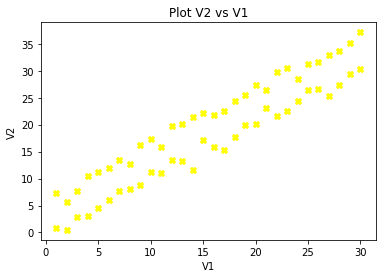

In [7]:
#Generating a scatter plot for V2 vs V1
plt.scatter(assg3_dataset.iloc[:,0],assg3_dataset.iloc[:,1], color = "yellow",marker="X")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title("Plot V2 vs V1")

Yes, there is clear separation of the raw data from the above plot.

Part2&3: Apply your own PCA class to this dataset without scaling the two variables.Project the raw data onto your first principal component axis, i.e. the PC1 axis.
-Add the PC1 axis to the plot you obtained in (1).

In [8]:
#Parent class is defined as d_pCA.
class d_PCA:    
    
    #constructor which takes number of components.
    def __init__(self, num_of_components):        
        self.num_of_components = num_of_components  
        
    #A method/function is built within the class which takes in dataset X, correlation logic as boolean.
    def fit_transform(self, x, corr_logic = False):   
        
        #calculating the mean centering
        column_mean = x.mean(axis=0) 
        #stack the data
        column_mean_stacked = np.tile(column_mean, reps=(x.shape[0], 1)) 
        #substract the each individual mean value to the dataset mean value
        x_mean_centered = x - column_mean_stacked   
        
        # use mean_centered data or standardized mean_centered data        
        if not corr_logic:            
            data_for_pca = x_mean_centered        
        else:   
            #if there is correlation then calculate the standard deviation
            column_sd = np.std(x, axis=0)            
            column_sd_stacked = np.tile(column_sd, reps=(x.shape[0], 1))            
            data_for_pca = x / column_sd_stacked
             
        # get covariance matrix of the data        
        covariance_matrix = np.cov(data_for_pca, rowvar=False)    
            
        # eigendecomposition of the covariance matrix        
        w, v = LA.eig(covariance_matrix)
        
        w = w.real        
        v = v.real  
            
        # sort eigenvalues in descending order        
        II = w.argsort()[::-1]        
        all_eigenvalues = w[II]        
        all_eigenvectors = v[:, II]    
            
        # get percent variance        
        percent_variance_explained = all_eigenvalues / sum(all_eigenvalues) * 100  
        print("The percent Variance from PCA:", percent_variance_explained)
        
        # get scores        
        pca_scores = np.matmul(data_for_pca, all_eigenvectors)  
         
        # collect PCA results        
        pca_results = {'data': x,
                       'mean_centered_data': x_mean_centered,
                       'percent_variance_explained': percent_variance_explained,
                       'loadings': all_eigenvectors,
                       'scores': pca_scores, 'data_after_pretreatment': data_for_pca}  
    
        
        # scores plot 
        fig, ax = plt.subplots()            
        ax.scatter(pca_results['scores'].iloc[:,0], pca_results['scores'].iloc[:,1], color='red')            
        ax.set_title('scores plot')            
        ax.set_xlabel('PC1')            
        ax.set_ylabel('PC2')            
        fig.show()
        
        # projection of raw data onto PC1:
        fig, ax = plt.subplots()            
        ax.scatter(pca_results['data'].iloc[:,0], pca_results['data'].iloc[:,1], color='green')                      
        ax.plot([0, 40*pca_results['loadings'][0, 0]], [0, 40*pca_results['loadings'][1, 0]],color='blue', linewidth=3) 
        ax.legend(['PC1 axis','Raw data'])
        ax.set_title('raw data on PC1 axis')            
        ax.set_aspect('equal', 'box')            
        ax.set_xlabel('V1')            
        ax.set_ylabel('V2')            
        fig.show()
        
        
        #Add pc1 axis to V2 vs V1 plot in part1
        fig, ax = plt.subplots()   
        plt.scatter(x.iloc[:,0],x.iloc[:,1], color = "purple")
        ax.plot([0, 50*pca_results['loadings'][0, 0]], [0, 50*pca_results['loadings'][1, 0]],color='yellow', linewidth=3)  
        ax.legend(['PC1 axis','Raw data'])
        ax.set_title('PC1 axis added to plot V2 vs V1')            
        ax.set_aspect('equal', 'box')            
        ax.set_xlabel('V1')            
        ax.set_ylabel('V2')            
        fig.show()
        
        return pca_results

The percent Variance from PCA: [9.67725518e+01 3.21285950e+00 1.45886865e-02]


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


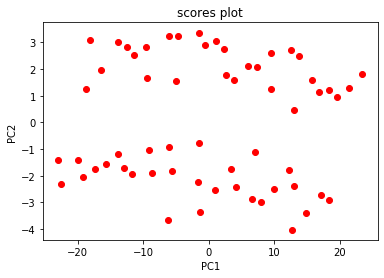

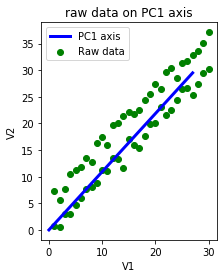

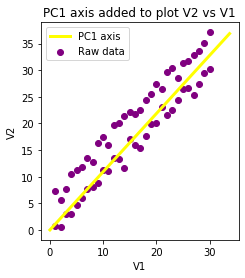

In [9]:
#instantiate of the parent class d_PCA.
data1 = d_PCA(1)
# access the instance attributes
pca_results = data1.fit_transform(assg3_dataset)


Part4: Apply your own LDA class to this dataset and obtain W. The class information of each data point is in the label column.



In [10]:
#building a class for two-class LDA:
class LDA_analysis:
    
    #constructor which takes number of components.
    def __init__(self,n_components):
        
        self.n_components = n_components
        
        #In this variable, we store eigenvectors
        self.linear_discriminants = None
        
    
    #A method/function is built within the class which takes in dataset variables and labels
    def fit(self,variables, labels):
        
        #taking the number of features from the variables
        n_features = np.shape(variables)[1] # 150, 4 -> 4
        #This is to show the unique labels 
        class_labels = np.unique(labels) # [0,1,2]
        
        #Working on scatter matrix within and between
        #calculating the mean for all the columns
        mean_overall = np.mean(variables, axis=0)
        
        S_Within = np.zeros((n_features,n_features)) # 4 X 4
        S_Between = np.zeros((n_features,n_features)) # 4 X 4  for iris data
        
        #for loop the class labels
        for c in class_labels:
            X_c = variables[labels==c]
            #Calculate the mean of X_c
            mean_c = np.mean(X_c, axis = 0)
            ##substract the each individual mean value to the dataset mean value and do a dot product 
            #to calculate scatter matrix within
            S_Within += (X_c - mean_c).T.dot(X_c - mean_c)
       
            #Here, we are find the count of first column
            n_count = X_c.shape[0]
            #calculate the mean difference from mean overall and reshape the features
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            #Take the mean difference dot product and multiple it with total number of rows.
            S_Between += n_count * (mean_diff).dot(mean_diff.T)
        
        #calculate the dot product of Scatter matrix within and between
        A = np.linalg.inv(S_Within).dot(S_Between)
        
        #Calculate the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(A)
        #transpose the eigenvectors
        eigenvectors = eigenvectors.T
        
        #Sort the eigenvalues and eigenvectors
        #getting absolute eigenvalues and sort by decreasing order
        indxs = np.argsort(abs(eigenvalues))[::-1]
        
        #Now get the eigenvalues and eigenvectors from the variable indices
        eigenvalues = eigenvalues[indxs]
        eigenvectors = eigenvectors[indxs]
        print("The Eigenvalues:\n", eigenvalues)
        print("The Eigenvectors:\n", eigenvectors)
        
        percent_variance_explained = eigenvalues / sum(eigenvalues) * 100 
        print("The percent Variance from LDA:", percent_variance_explained)
        
        #Store the first eigenvectors with highest value into the linear discriminant created above and set to two dimensional
        #calculated W
        self.linear_discriminants = eigenvectors[0:self.n_components]
        print("The matrix W:\n",self.linear_discriminants.T)
        print("Variance of W:\n",np.var(self.linear_discriminants.T))
        
        
        return self.linear_discriminants
        
    #This method  transform the data and returns the scores   
    def transform(self,variables):
        
        #return np.matmul(variables,self.linear_discriminants.T)
        return np.dot(variables, self.linear_discriminants.T)
         
    

In [11]:
#calling the class of LDA
#passing the number of components
lda = LDA_analysis(1)

#calling the methods from the class and passing the parameters
data_W = lda.fit(V_variables,label_data)

#This return the scores to plot
data_projected = lda.transform(V_variables)
data_projected = -data_projected


The Eigenvalues:
 [9.03723973 0.        ]
The Eigenvectors:
 [[-0.71381103  0.70033836]
 [ 1.          0.        ]]
The percent Variance from LDA: [100.   0.]
The matrix W:
 [[-0.71381103]
 [ 0.70033836]]
Variance of W:
 0.49995462182541744


Part5: Project your raw data onto W. Do you see a clear separation of the data in the projection onto W?

Variance of Normalized W:
 0.49995462182541744


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


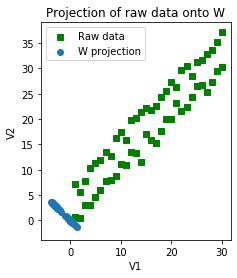

In [12]:
#returned W matrix is normalized using inbuilt function
normalize_data = LA.norm(data_W)
#Divide W with normalized data
new_W = data_W/normalize_data

print("Variance of Normalized W:\n",np.var(new_W))

#Plot the raw data onto W.
fig, ax = plt.subplots()   
ax.scatter(V_variables[:,0],V_variables[:,1], color = "green",marker='s') #the raw data points
project_points = np.dot(V_variables,new_W.T)*new_W/np.dot(new_W,new_W.T) # calculating the projection points
ax.scatter(project_points[:,0],project_points[:,1],cmap=plt.cm.get_cmap('Paired_r',2)) # projecting the points
ax.legend(['Raw data','W projection'])
ax.set_title('Projection of raw data onto W')            
ax.set_aspect('equal', 'box')            
ax.set_xlabel('V1')            
ax.set_ylabel('V2')            
fig.show()

Part6: Add the W axis to your plot. At this point, your plot should contain the raw data points, the PC1 axis you obtain from the PCA analysis, and the W axis you obtain from the LDA analysis.

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


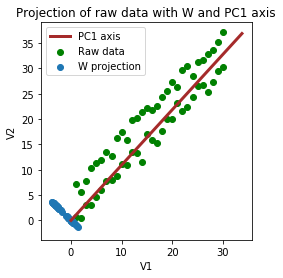

In [13]:
#Plot the raw data onto W with PC1 axis
fig, ax = plt.subplots()   
ax.scatter(V_variables[:,0],V_variables[:,1], color = "green")#the raw data points
ax.scatter(project_points[:,0],project_points[:,1],cmap=plt.cm.get_cmap('Paired_r',2))# projecting the points
ax.plot([0, 50*pca_results['loadings'][0, 0]], [0, 50*pca_results['loadings'][1, 0]],color='brown', linewidth=3)# adding PC1 axis 
ax.legend(['PC1 axis','Raw data','W projection'])
ax.set_title('Projection of raw data with W and PC1 axis')            
ax.set_aspect('equal', 'box')            
ax.set_xlabel('V1')            
ax.set_ylabel('V2')            
fig.show()

part7:Compute the variance of the projections onto the W axis.

- The Variance of W is calculated in the above code and the value of it is 0.4999

Part8:What message can you get from the above PCA and LDA analyses?

- The message we get from PCA and LDA are the percent variance is better in LDA(100%) over that of PCA(96%). Also, the classification of features is better in case of LDA than that of PCA.